In [3]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py

In [699]:
import pandas as pd
data = pd.read_csv("/Users/diloretotheo/Desktop/waveletT.csv")

In [700]:
len(data)

1907

In [702]:
data.head(10)

,Unnamed: 0,c.pred3..0.,yr,yr22,Open,High,Low,Close,Volume,hma8,...,Close.5,EWMA5,EWMA6,EWMA7,EWMA8,EWMA9,EWMA10,EWMA20,hma20,hma4
0,1,0.411841,0.405082,0.397722,0.000975,0.000200,0.001555,0.000996,0.000051,0.000666,...,0.679373,0.000249,0.000159,0.000103,0.000043,0.000000,0.000000,0.000000e+00,0.000563,0.000886
1,2,0.418862,0.411841,0.403484,0.001019,0.000238,0.001584,0.001010,0.000046,0.000688,...,0.675416,0.000279,0.000187,0.000130,0.000067,0.000021,0.000018,6.491246e-07,0.000636,0.000907
2,3,0.424679,0.418862,0.409853,0.001030,0.000319,0.001579,0.001136,0.000036,0.000733,...,0.688843,0.000343,0.000246,0.000184,0.000116,0.000066,0.000059,1.611495e-05,0.000717,0.000992
3,4,0.433335,0.424679,0.415804,0.001161,0.000430,0.001728,0.001195,0.000021,0.000807,...,0.680769,0.000406,0.000306,0.000240,0.000169,0.000114,0.000104,3.712293e-05,0.000806,0.001091
4,5,0.446788,0.433335,0.423842,0.001212,0.000580,0.001803,0.001365,0.000126,0.000925,...,0.693886,0.000509,0.000401,0.000328,0.000251,0.000191,0.000175,7.629609e-05,0.000909,0.001223
5,6,0.459582,0.446788,0.435182,0.001386,0.001280,0.001947,0.002095,0.000418,0.001305,...,0.757342,0.000833,0.000691,0.000591,0.000492,0.000414,0.000382,1.982554e-04,0.001094,0.001745
6,7,0.467745,0.459582,0.446756,0.002115,0.001537,0.002499,0.002011,0.000449,0.001653,...,0.664331,0.001020,0.000873,0.000766,0.000660,0.000573,0.000534,2.986947e-04,0.001310,0.002080
7,8,0.473347,0.467745,0.456143,0.002043,0.001298,0.002373,0.001997,0.000275,0.001822,...,0.672058,0.001140,0.000998,0.000894,0.000786,0.000698,0.000656,3.878655e-04,0.001523,0.001993
8,9,0.477683,0.473347,0.463801,0.002023,0.001241,0.002355,0.001769,0.000180,0.001767,...,0.647820,0.001140,0.001018,0.000927,0.000829,0.000747,0.000709,4.414857e-04,0.001685,0.001745
9,10,0.479607,0.477683,0.469782,0.001789,0.000982,0.002187,0.001800,0.000135,0.001597,...,0.677256,0.001150,0.001042,0.000961,0.000871,0.000794,0.000759,4.937250e-04,0.001794,0.001626


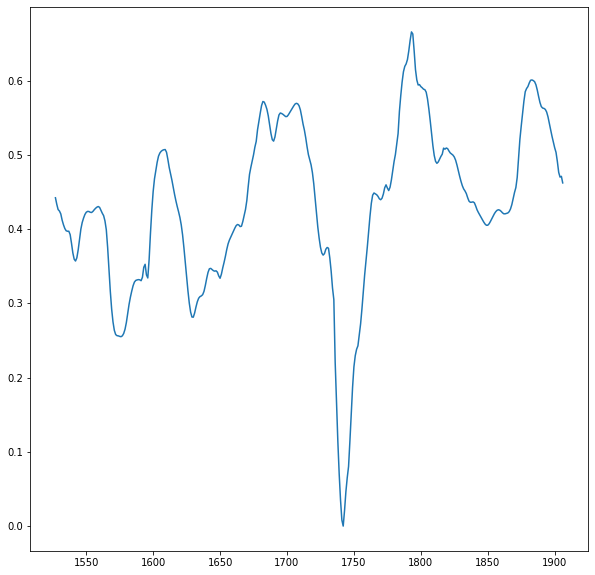

In [697]:
plt.figure(figsize=(10,10)) #time_steps = 4 with 2 variables

plt.plot(data['yr'][1527:1907])

In [10]:
print(trainx.shape)
trainx.head()

(1526, 2)


,yr,yr22
0,0.405082,0.397722
1,0.411841,0.403484
2,0.418862,0.409853
3,0.424679,0.415804
4,0.433335,0.423842


In [18]:
reg_x = data.iloc[0:1526, 2:]
reg_y = data.iloc[0:1526, 1:2]

In [19]:
val = mutual_info_regression(reg_x,reg_y)
val = pd.Series(val)
val.index = reg_x.columns
val.sort_values(ascending=False,inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
val

yr           2.474270
macd.11      2.417520
yr22         2.058318
signal.13    1.206840
kst          1.165661
               ...   
Close.3      0.227921
Close.2      0.126995
Close.5      0.087444
Close.1      0.087444
clv          0.033237
Length: 82, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [21]:
RF = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1))
RF.fit(reg_x,reg_y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, no

In [22]:
reg_x.columns[RF.get_support()]

Index(['yr', 'macd.11'], dtype='object')

In [23]:
trainx = (data.iloc[0:1526, 2:4])
trainy = (data.iloc[0:1526, 1:2])

testx = (data.iloc[1527:, 2:4])
testy = (data.iloc[1527:, 1:2])

In [32]:
trainx.head()

,yr,yr22
0,0.405082,0.397722
1,0.411841,0.403484
2,0.418862,0.409853
3,0.424679,0.415804
4,0.433335,0.423842


In [34]:
trainy.head(25)

,c.pred3..0.
0,0.411841
1,0.418862
2,0.424679
3,0.433335
4,0.446788
5,0.459582
6,0.467745
7,0.473347
8,0.477683
9,0.479607


In [24]:
def format_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps),:].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [25]:
format_dataset(trainx, trainy, time_steps=4)

(array([[[0.40508243, 0.39772209],
         [0.41184094, 0.40348415],
         [0.41886245, 0.40985299],
         [0.42467894, 0.41580422]],
 
        [[0.41184094, 0.40348415],
         [0.41886245, 0.40985299],
         [0.42467894, 0.41580422],
         [0.43333548, 0.42384158]],
 
        [[0.41886245, 0.40985299],
         [0.42467894, 0.41580422],
         [0.43333548, 0.42384158],
         [0.44678815, 0.4351818 ]],
 
        ...,
 
        [[0.51541769, 0.49913896],
         [0.52665425, 0.51362112],
         [0.52865337, 0.52020479],
         [0.5247964 , 0.52060589]],
 
        [[0.52665425, 0.51362112],
         [0.52865337, 0.52020479],
         [0.5247964 , 0.52060589],
         [0.51750931, 0.51626929]],
 
        [[0.52865337, 0.52020479],
         [0.5247964 , 0.52060589],
         [0.51750931, 0.51626929],
         [0.50291748, 0.50468266]]]),
 array([[0.44678815],
        [0.45958186],
        [0.46774548],
        ...,
        [0.50291748],
        [0.47847099],
    

In [43]:
time_steps = 20

X_train, y_train = format_dataset(trainx, trainy, time_steps)
X_test, y_test = format_dataset(testx, testy, time_steps)

In [44]:
print(X_train.shape)

(1506, 20, 2)


In [45]:
print(X_train)

[[[0.40508243 0.39772209]
  [0.41184094 0.40348415]
  [0.41886245 0.40985299]
  ...
  [0.48167609 0.47539483]
  [0.48649002 0.47947441]
  [0.49410199 0.48573996]]

 [[0.41184094 0.40348415]
  [0.41886245 0.40985299]
  [0.42467894 0.41580422]
  ...
  [0.48649002 0.47947441]
  [0.49410199 0.48573996]
  [0.49982291 0.49126076]]

 [[0.41886245 0.40985299]
  [0.42467894 0.41580422]
  [0.43333548 0.42384158]
  ...
  [0.49410199 0.48573996]
  [0.49982291 0.49126076]
  [0.50115172 0.49435598]]

 ...

 [[0.40889277 0.41019791]
  [0.39498447 0.39755517]
  [0.38460222 0.38632932]
  ...
  [0.52665425 0.51362112]
  [0.52865337 0.52020479]
  [0.5247964  0.52060589]]

 [[0.39498447 0.39755517]
  [0.38460222 0.38632932]
  [0.37473342 0.37526616]
  ...
  [0.52865337 0.52020479]
  [0.5247964  0.52060589]
  [0.51750931 0.51626929]]

 [[0.38460222 0.38632932]
  [0.37473342 0.37526616]
  [0.36336477 0.363862  ]
  ...
  [0.5247964  0.52060589]
  [0.51750931 0.51626929]
  [0.50291748 0.50468266]]]


In [46]:
print(y_train)

[[0.50115172]
 [0.50221171]
 [0.50587505]
 ...
 [0.50291748]
 [0.47847099]
 [0.45739843]]


In [47]:
regressor = Sequential()

regressor.add(LSTM(units = 600, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 72)

Epoch 1/100
1506/1506 [==============================] - 20s 13ms/step - loss: 0.0371
Epoch 2/100
1506/1506 [==============================] - 10s 7ms/step - loss: 0.0129
Epoch 3/100
1506/1506 [==============================] - 8s 5ms/step - loss: 0.0110
Epoch 4/100
1506/1506 [==============================] - 9s 6ms/step - loss: 0.0088
Epoch 5/100
1506/1506 [==============================] - 14s 9ms/step - loss: 0.0076
Epoch 6/100
1506/1506 [==============================] - 18s 12ms/step - loss: 0.0060
Epoch 7/100
1506/1506 [==============================] - 19s 13ms/step - loss: 0.0057
Epoch 8/100
1506/1506 [==============================] - 14s 9ms/step - loss: 0.0050
Epoch 9/100
1506/1506 [==============================] - 15s 10ms/step - loss: 0.0051
Epoch 10/100
1506/1506 [==============================] - 12s 8ms/step - loss: 0.0062
Epoch 11/100
1506/1506 [==============================] - 11s 7ms/step - loss: 0.0053
Epoch 12/100
1506/1506 [==============================] - 8s 

In [41]:
LSTMpred = regressor.predict(X_test)

In [48]:
LSTMpred20 = regressor.predict(X_test)

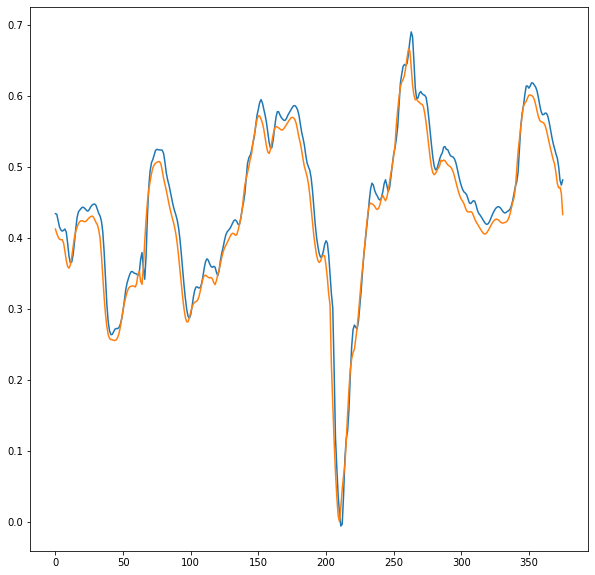

In [42]:
plt.figure(figsize=(10,10)) #time_steps = 4 with 2 variables
plt.plot(LSTMpred)
plt.plot( y_test)

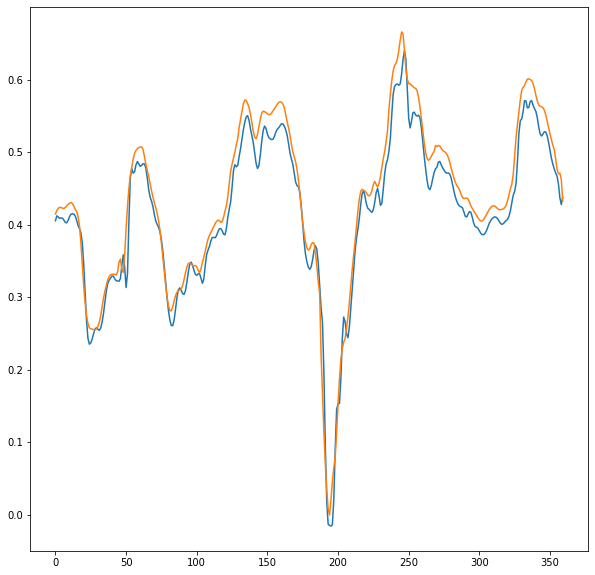

In [49]:
plt.figure(figsize=(10,10)) #time_steps = 20 with 2 variables
plt.plot(LSTMpred20)
plt.plot( y_test)

# Adding LAG


In [52]:
macd = data['macd.11']
macdtr = macd[0:1526]
macdte = macd[1527:]

In [53]:
trainx2 = (data.iloc[0:1526, 2:4])
trainx2['macd'] = macdtr
trainy2 = (data.iloc[0:1526, 1:2])

testx2 = (data.iloc[1527:, 2:4])
testx2['macd'] = macdte
testy2 = (data.iloc[1527:, 1:2])

In [58]:
def series_to_supervised(data, n_in=1,n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [59]:
X = series_to_supervised(trainx2, n_in=4,n_out=1, dropnan=True)
Xt = series_to_supervised(testx2, n_in=4,n_out=1, dropnan=True)

In [60]:
X

,var1(t-4),var2(t-4),var3(t-4),var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
4,0.405082,0.397722,0.405469,0.411841,0.403484,0.408975,0.418862,0.409853,0.414434,0.424679,0.415804,0.420068,0.433335,0.423842,0.427905
5,0.411841,0.403484,0.408975,0.418862,0.409853,0.414434,0.424679,0.415804,0.420068,0.433335,0.423842,0.427905,0.446788,0.435182,0.448019
6,0.418862,0.409853,0.414434,0.424679,0.415804,0.420068,0.433335,0.423842,0.427905,0.446788,0.435182,0.448019,0.459582,0.446756,0.461840
7,0.424679,0.415804,0.420068,0.433335,0.423842,0.427905,0.446788,0.435182,0.448019,0.459582,0.446756,0.461840,0.467745,0.456143,0.471949
8,0.433335,0.423842,0.427905,0.446788,0.435182,0.448019,0.459582,0.446756,0.461840,0.467745,0.456143,0.471949,0.473347,0.463801,0.475094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,0.476671,0.457082,0.477551,0.497338,0.479156,0.500914,0.515418,0.499139,0.518530,0.526654,0.513621,0.528881,0.528653,0.520205,0.525232
1522,0.497338,0.479156,0.500914,0.515418,0.499139,0.518530,0.526654,0.513621,0.528881,0.528653,0.520205,0.525232,0.524796,0.520606,0.524785
1523,0.515418,0.499139,0.518530,0.526654,0.513621,0.528881,0.528653,0.520205,0.525232,0.524796,0.520606,0.524785,0.517509,0.516269,0.520456
1524,0.526654,0.513621,0.528881,0.528653,0.520205,0.525232,0.524796,0.520606,0.524785,0.517509,0.516269,0.520456,0.502917,0.504683,0.506066


In [67]:
train_X = X.values.reshape((-1, 1, X.shape[1]))
test_X = Xt.values.reshape((-1, 1, Xt.shape[1]))

trainy = trainy2.values.reshape((-1))
testy = testy2.values.reshape((-1))

trainy = trainy[4:1526] # lag = 4 : 4 first numbers are lost 
testy = testy[4:1526]

print(train_X.shape, trainy.shape, test_X.shape, testy.shape)

(1522, 1, 15) (1522,) (376, 1, 15) (376,)


In [75]:
trainx2.head(10)

,yr,yr22,macd
0,0.405082,0.397722,0.405469
1,0.411841,0.403484,0.408975
2,0.418862,0.409853,0.414434
3,0.424679,0.415804,0.420068
4,0.433335,0.423842,0.427905
5,0.446788,0.435182,0.448019
6,0.459582,0.446756,0.461840
7,0.467745,0.456143,0.471949
8,0.473347,0.463801,0.475094
9,0.477683,0.469782,0.477634


In [76]:
train_X[0]

array([[0.40508243, 0.39772209, 0.40546919, 0.41184094, 0.40348415,
        0.40897496, 0.41886245, 0.40985299, 0.41443438, 0.42467894,
        0.41580422, 0.42006829, 0.43333548, 0.42384158, 0.42790523]])

In [69]:
trainy

array([0.44678815, 0.45958186, 0.46774548, ..., 0.50291748, 0.47847099,
       0.45739843])

In [71]:
regressor = Sequential()

regressor.add(LSTM(units = 600, return_sequences = True, input_shape = (train_X.shape[1], train_X.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(train_X, trainy, epochs = 100, batch_size = 72)

Epoch 1/100
1522/1522 [==============================] - 3s 2ms/step - loss: 0.1376
Epoch 2/100
1522/1522 [==============================] - 1s 721us/step - loss: 0.0114
Epoch 3/100
1522/1522 [==============================] - 1s 716us/step - loss: 0.0064
Epoch 4/100
1522/1522 [==============================] - 1s 662us/step - loss: 0.0047
Epoch 5/100
1522/1522 [==============================] - 1s 731us/step - loss: 0.0043
Epoch 6/100
1522/1522 [==============================] - 1s 785us/step - loss: 0.0039
Epoch 7/100
1522/1522 [==============================] - 1s 794us/step - loss: 0.0037
Epoch 8/100
1522/1522 [==============================] - 1s 681us/step - loss: 0.0038
Epoch 9/100
1522/1522 [==============================] - 1s 780us/step - loss: 0.0033
Epoch 10/100
1522/1522 [==============================] - 1s 629us/step - loss: 0.0033
Epoch 11/100
1522/1522 [==============================] - 1s 633us/step - loss: 0.0033
Epoch 12/100
1522/1522 [==============================

In [72]:
LSTMpredictedLag = regressor.predict(test_X)

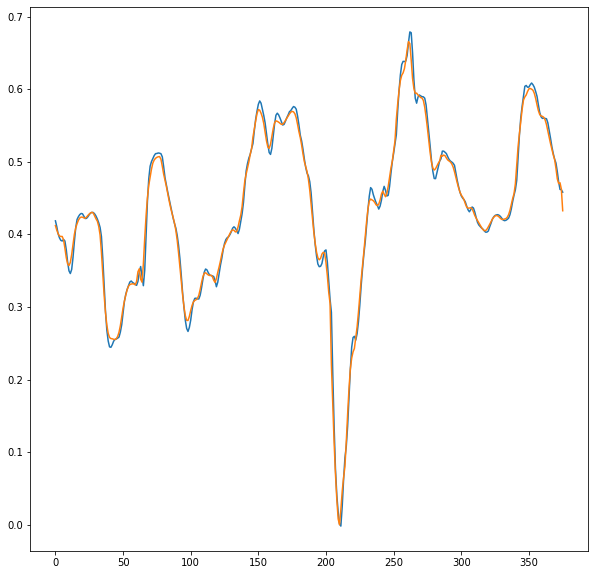

In [74]:
plt.figure(figsize=(10,10)) # lag = 4. time_steps = 0 with 3 variables
plt.plot(LSTMpredictedLag)
plt.plot( testy)

In [684]:
datatt = pd.DataFrame(LSTMpredictedLag)

In [689]:
print(datatt.shape)

(376, 1)


In [693]:
datatt.to_csv('datapython.csv',index=True)

# CNN + LSTM (one feature)


In [77]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [111]:
def split_sequences(sequences, n_steps):
        X, y = list(), list()
        for i in range(len(sequences)):
            end_ix = i + n_steps
            if end_ix > len(sequences)-1:
                break
            seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
            X.append(seq_x)
            y.append(seq_y)
        return array(X), array(y)
  

In [115]:
n_steps = 4
# split into samples
v = array(data.iloc[0:1526, 2:3])
Xcn, ycnn = split_sequences(v, n_steps)


In [116]:
n_features = 1
n_seq = 2
n_steps = 2
Xcnn = Xcn.reshape((Xcn.shape[0], n_seq, n_steps, n_features))

In [119]:
print(Xcnn[0])

[[[0.40508243]
  [0.41184094]]

 [[0.41886245]
  [0.42467894]]]


In [118]:
ycnn

array([[0.43333548],
       [0.44678815],
       [0.45958186],
       ...,
       [0.51750931],
       [0.50291748],
       [0.47847099]])

In [127]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 2, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(600, activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
  
model.fit(Xcnn, ycnn, epochs=100, verbose=1)

Epoch 1/100
1522/1522 [==============================] - 10s 7ms/step - loss: 0.0924
Epoch 2/100
1522/1522 [==============================] - 2s 1ms/step - loss: 0.0097
Epoch 3/100
1522/1522 [==============================] - 3s 2ms/step - loss: 0.0057
Epoch 4/100
1522/1522 [==============================] - 2s 1ms/step - loss: 0.0051
Epoch 5/100
1522/1522 [==============================] - 2s 1ms/step - loss: 0.0050
Epoch 6/100
1522/1522 [==============================] - 3s 2ms/step - loss: 0.0049
Epoch 7/100
1522/1522 [==============================] - 3s 2ms/step - loss: 0.0038
Epoch 8/100
1522/1522 [==============================] - 2s 1ms/step - loss: 0.0037
Epoch 9/100
1522/1522 [==============================] - 2s 1ms/step - loss: 0.0033
Epoch 10/100
1522/1522 [==============================] - 2s 1ms/step - loss: 0.0035
Epoch 11/100
1522/1522 [==============================] - 3s 2ms/step - loss: 0.0035
Epoch 12/100
1522/1522 [==============================] - 3s 2ms/step - l

In [128]:
n_steps = 4
# split into samples
vt = array(data.iloc[1527:, 2:3])
Xn, yn = split_sequences(vt, n_steps)

n_features = 1
n_seq = 2
n_steps = 2
Xn = Xn.reshape((Xn.shape[0], n_seq, n_steps, n_features))

In [129]:
CNNpred = model.predict(Xn, verbose=1)
print(pred)

376/376 [==============================] - 8s 22ms/step
[[0.41517377]
 [0.41722912]
 [0.41535118]
 [0.40028608]
 [0.3919866 ]
 [0.38994884]
 [0.3914287 ]
 [0.39572668]
 [0.39695638]
 [0.3902425 ]
 [0.36810887]
 [0.34813175]
 [0.34152767]
 [0.35608461]
 [0.37686032]
 [0.3988741 ]
 [0.41274968]
 [0.42158607]
 [0.4251433 ]
 [0.42681977]
 [0.42822632]
 [0.42771888]
 [0.42561197]
 [0.4243824 ]
 [0.422397  ]
 [0.42473605]
 [0.4296147 ]
 [0.43211883]
 [0.43341976]
 [0.43375313]
 [0.43279418]
 [0.4299425 ]
 [0.4218623 ]
 [0.4147469 ]
 [0.41158298]
 [0.4010866 ]
 [0.38208517]
 [0.353162  ]
 [0.32760128]
 [0.28991327]
 [0.262815  ]
 [0.25087494]
 [0.24769749]
 [0.25070602]
 [0.25792146]
 [0.26267618]
 [0.26269537]
 [0.26438254]
 [0.27088195]
 [0.28074783]
 [0.29343826]
 [0.30548453]
 [0.31534356]
 [0.3225688 ]
 [0.32850778]
 [0.33419323]
 [0.3376507 ]
 [0.33754277]
 [0.3361312 ]
 [0.33531225]
 [0.3346709 ]
 [0.33374828]
 [0.3393743 ]
 [0.35745454]
 [0.36116117]
 [0.35524213]
 [0.32742465]
 [0.36

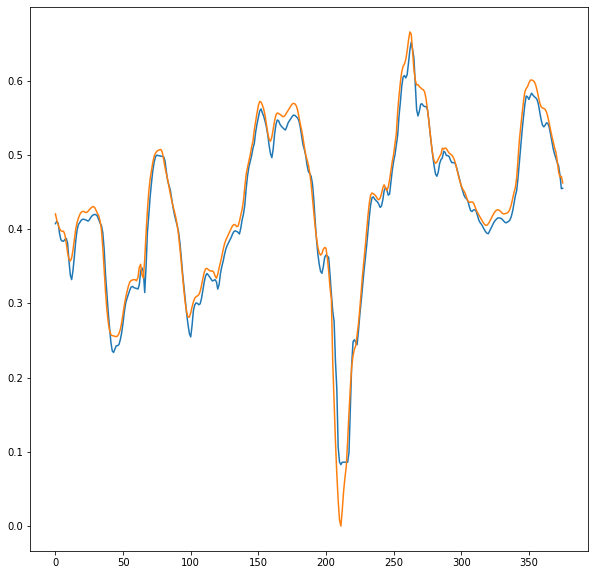

In [130]:
plt.figure(figsize=(10,10))
plt.plot(CNNpred)
plt.plot( yn)

# CNN + Dense (multiple features)

In [453]:
b = np.array(data.iloc[0:1526, 2:4])
va = np.array(data.iloc[1527:, 2:4])

In [454]:
b.shape

(1526, 2)

In [458]:
X_train_series1 = b.reshape((b.shape[0], b.shape[1], 1))
X_valid_series1 = va.reshape((va.shape[0], va.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (1526, 2, 1)
Validation set shape (380, 2, 1)


In [464]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_series1.shape[1], X_train_series1.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 2, 64)             128       
_________________________________________________________________
max_pooling1d_76 (MaxPooling (None, 1, 64)             0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 101       
Total params: 6,729
Trainable params: 6,729
Non-trainable params: 0
_________________________________________________________________


In [465]:
Y_train1 = np.array(data.iloc[0:1526, 1:2])
Y_valid1 = np.array(data.iloc[1527:, 1:2])

In [466]:
cnn_history = model_cnn.fit(X_train_series1, Y_train1, validation_data=(X_valid_series1, Y_valid1), epochs=10, verbose=2)




Train on 1526 samples, validate on 380 samples
Epoch 1/10
 - 3s - loss: 0.0395 - val_loss: 0.0013
Epoch 2/10
 - 0s - loss: 0.0013 - val_loss: 6.5346e-04
Epoch 3/10
 - 0s - loss: 4.5840e-04 - val_loss: 2.2796e-04
Epoch 4/10
 - 0s - loss: 2.7205e-04 - val_loss: 2.2000e-04
Epoch 5/10
 - 0s - loss: 2.6773e-04 - val_loss: 2.1402e-04
Epoch 6/10
 - 0s - loss: 2.6834e-04 - val_loss: 2.2208e-04
Epoch 7/10
 - 0s - loss: 2.7080e-04 - val_loss: 2.2210e-04
Epoch 8/10
 - 0s - loss: 2.6708e-04 - val_loss: 2.2135e-04
Epoch 9/10
 - 0s - loss: 2.6747e-04 - val_loss: 2.1471e-04
Epoch 10/10
 - 0s - loss: 2.7492e-04 - val_loss: 2.1226e-04


In [467]:
CNNpred = model_cnn.predict(X_valid_series1, verbose=1)
print(pred)

380/380 [==============================] - 2s 5ms/step
[[0.41517377]
 [0.41722912]
 [0.41535118]
 [0.40028608]
 [0.3919866 ]
 [0.38994884]
 [0.3914287 ]
 [0.39572668]
 [0.39695638]
 [0.3902425 ]
 [0.36810887]
 [0.34813175]
 [0.34152767]
 [0.35608461]
 [0.37686032]
 [0.3988741 ]
 [0.41274968]
 [0.42158607]
 [0.4251433 ]
 [0.42681977]
 [0.42822632]
 [0.42771888]
 [0.42561197]
 [0.4243824 ]
 [0.422397  ]
 [0.42473605]
 [0.4296147 ]
 [0.43211883]
 [0.43341976]
 [0.43375313]
 [0.43279418]
 [0.4299425 ]
 [0.4218623 ]
 [0.4147469 ]
 [0.41158298]
 [0.4010866 ]
 [0.38208517]
 [0.353162  ]
 [0.32760128]
 [0.28991327]
 [0.262815  ]
 [0.25087494]
 [0.24769749]
 [0.25070602]
 [0.25792146]
 [0.26267618]
 [0.26269537]
 [0.26438254]
 [0.27088195]
 [0.28074783]
 [0.29343826]
 [0.30548453]
 [0.31534356]
 [0.3225688 ]
 [0.32850778]
 [0.33419323]
 [0.3376507 ]
 [0.33754277]
 [0.3361312 ]
 [0.33531225]
 [0.3346709 ]
 [0.33374828]
 [0.3393743 ]
 [0.35745454]
 [0.36116117]
 [0.35524213]
 [0.32742465]
 [0.362

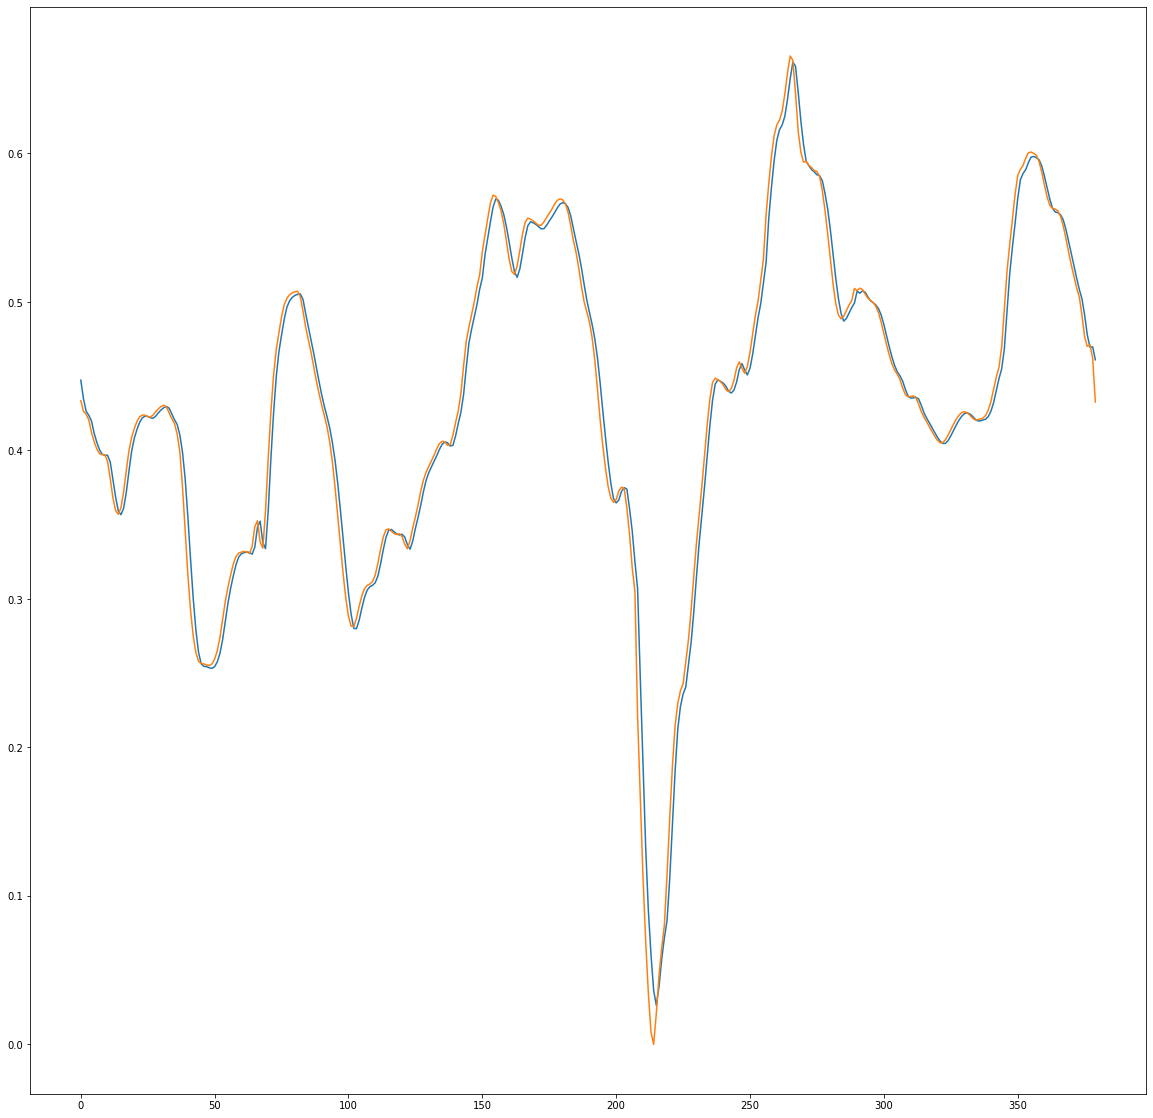

In [473]:
plt.figure(figsize=(20,20))
plt.plot(CNNpred)
plt.plot(Cnntesty)

# CNN + LSTM

In [435]:
Cnntrain = (data.iloc[0:1526, 2:4])
Cnntrain['macd'] = macdtr
Cnntrain = array(Cnntrain)
Cnntrainy = array(data.iloc[0:1526, 1:2])

Cnntest = (data.iloc[1527:, 2:4])
Cnntest['macd'] = macdte
Cnntest = array(Cnntest)
Cnntesty = array(data.iloc[1527:, 1:2])

In [436]:
Cnntrain.shape[1]

3

In [437]:
X_train_series = Cnntrain.reshape((Cnntrain.shape[0], Cnntrain.shape[1], 1))
X_valid_series = Cnntest.reshape((Cnntest.shape[0], Cnntest.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)



Train set shape (1526, 3, 1)
Validation set shape (380, 3, 1)


In [438]:
print(X_train_series)

[[[0.40508243]
  [0.39772209]
  [0.40546919]]

 [[0.41184094]
  [0.40348415]
  [0.40897496]]

 [[0.41886245]
  [0.40985299]
  [0.41443438]]

 ...

 [[0.51750931]
  [0.51626929]
  [0.52045632]]

 [[0.50291748]
  [0.50468266]
  [0.5060662 ]]

 [[0.47847099]
  [0.48570902]
  [0.47640351]]]


In [439]:
subsequences = 1
timesteps = X_train_series.shape[1]//subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_valid_series.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (1526, 1, 3, 1)
Validation set shape (380, 1, 3, 1)


In [440]:
#X_train_series_sub.shape[1], X_train_series_sub.shape[2], X_train_series_sub.shape[3])
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(X_train_series_sub.shape[1], X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')


In [441]:
cnn_history = model_cnn_lstm.fit(X_train_series_sub, Cnntrainy, validation_data=(X_valid_series_sub, Cnntesty), epochs=10, verbose=2)




Train on 1526 samples, validate on 380 samples
Epoch 1/10
 - 4s - loss: 0.1709 - val_loss: 0.0541
Epoch 2/10
 - 0s - loss: 0.0176 - val_loss: 0.0035
Epoch 3/10
 - 0s - loss: 0.0030 - val_loss: 0.0028
Epoch 4/10
 - 0s - loss: 0.0024 - val_loss: 0.0022
Epoch 5/10
 - 0s - loss: 0.0018 - val_loss: 0.0017
Epoch 6/10
 - 0s - loss: 0.0013 - val_loss: 0.0014
Epoch 7/10
 - 0s - loss: 9.6094e-04 - val_loss: 9.7322e-04
Epoch 8/10
 - 0s - loss: 7.2826e-04 - val_loss: 7.5402e-04
Epoch 9/10
 - 0s - loss: 6.1015e-04 - val_loss: 6.2348e-04
Epoch 10/10
 - 0s - loss: 5.5604e-04 - val_loss: 5.5194e-04


In [446]:
CNNLSTMpred = model_cnn_lstm.predict(X_valid_series_sub, verbose=1)
print(pred)

380/380 [==============================] - 0s 682us/step
[[0.41517377]
 [0.41722912]
 [0.41535118]
 [0.40028608]
 [0.3919866 ]
 [0.38994884]
 [0.3914287 ]
 [0.39572668]
 [0.39695638]
 [0.3902425 ]
 [0.36810887]
 [0.34813175]
 [0.34152767]
 [0.35608461]
 [0.37686032]
 [0.3988741 ]
 [0.41274968]
 [0.42158607]
 [0.4251433 ]
 [0.42681977]
 [0.42822632]
 [0.42771888]
 [0.42561197]
 [0.4243824 ]
 [0.422397  ]
 [0.42473605]
 [0.4296147 ]
 [0.43211883]
 [0.43341976]
 [0.43375313]
 [0.43279418]
 [0.4299425 ]
 [0.4218623 ]
 [0.4147469 ]
 [0.41158298]
 [0.4010866 ]
 [0.38208517]
 [0.353162  ]
 [0.32760128]
 [0.28991327]
 [0.262815  ]
 [0.25087494]
 [0.24769749]
 [0.25070602]
 [0.25792146]
 [0.26267618]
 [0.26269537]
 [0.26438254]
 [0.27088195]
 [0.28074783]
 [0.29343826]
 [0.30548453]
 [0.31534356]
 [0.3225688 ]
 [0.32850778]
 [0.33419323]
 [0.3376507 ]
 [0.33754277]
 [0.3361312 ]
 [0.33531225]
 [0.3346709 ]
 [0.33374828]
 [0.3393743 ]
 [0.35745454]
 [0.36116117]
 [0.35524213]
 [0.32742465]
 [0.3

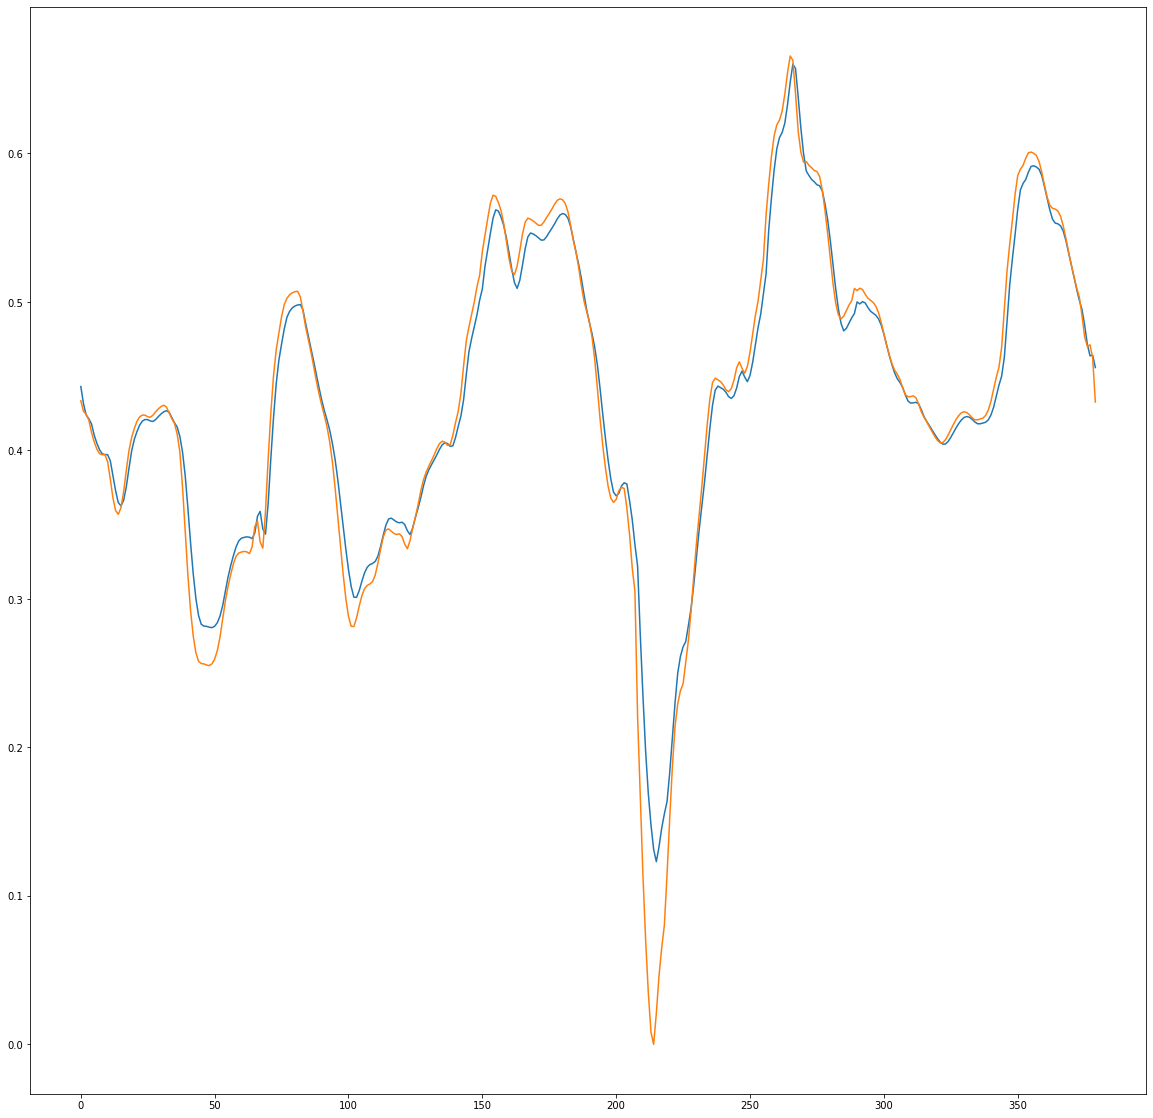

In [474]:
plt.figure(figsize=(20,20))
plt.plot(CNNLSTMpred)
plt.plot(Cnntesty)

# CNN + LSTM (with Lag)

In [475]:
C = series_to_supervised(trainx2, n_in=4,n_out=1, dropnan=True)
Ct = series_to_supervised(testx2, n_in=4,n_out=1, dropnan=True)

In [477]:
'''train_Cnn = C.values.reshape((-1, 1, C.shape[1]))
test_Cnn = Ct.values.reshape((-1, 1, Ct.shape[1]))

trainyCnn = trainy2.values.reshape((-1))
testyCnn = testy2.values.reshape((-1))

trainyCnn = trainyCnn[4:1526] # lag = 4 : 4 first numbers are lost 
testyCnn = testyCnn[4:1526]

print(train_Cnn.shape, trainyCnn.shape, test_Cnn.shape, testyCnn.shape)

'''

(1522, 1, 15) (1522,) (376, 1, 15) (376,)


In [490]:
train_Cnn = C.values.reshape((C.shape[0], C.shape[1], 1))
test_Cnn = Ct.values.reshape((Ct.shape[0], Ct.shape[1], 1))
print('Train set shape', train_Cnn.shape)
print('Validation set shape', test_Cnn.shape)




Train set shape (1522, 15, 1)
Validation set shape (376, 15, 1)


In [502]:
train_Cnn[0]

array([[0.40508243],
       [0.39772209],
       [0.40546919],
       [0.41184094],
       [0.40348415],
       [0.40897496],
       [0.41886245],
       [0.40985299],
       [0.41443438],
       [0.42467894],
       [0.41580422],
       [0.42006829],
       [0.43333548],
       [0.42384158],
       [0.42790523]])

In [503]:
trainyCnn[0]

0.446788151983539

In [494]:
train_Cnn.shape[1]

15

In [496]:
subsequences = 3
timesteps = train_Cnn.shape[1]//subsequences
train_Cnn_sub = train_Cnn.reshape((train_Cnn.shape[0], subsequences, timesteps, 1))
test_Cnn_sub = test_Cnn.reshape((test_Cnn.shape[0], subsequences, timesteps, 1))
print('Train set shape', train_Cnn_sub.shape)
print('Validation set shape', test_Cnn_sub.shape)


Train set shape (1522, 3, 5, 1)
Validation set shape (376, 3, 5, 1)


In [500]:
train_Cnn_sub

array([[[[0.40508243],
         [0.39772209],
         [0.40546919],
         [0.41184094],
         [0.40348415]],

        [[0.40897496],
         [0.41886245],
         [0.40985299],
         [0.41443438],
         [0.42467894]],

        [[0.41580422],
         [0.42006829],
         [0.43333548],
         [0.42384158],
         [0.42790523]]],


       [[[0.41184094],
         [0.40348415],
         [0.40897496],
         [0.41886245],
         [0.40985299]],

        [[0.41443438],
         [0.42467894],
         [0.41580422],
         [0.42006829],
         [0.43333548]],

        [[0.42384158],
         [0.42790523],
         [0.44678815],
         [0.4351818 ],
         [0.4480193 ]]],


       [[[0.41886245],
         [0.40985299],
         [0.41443438],
         [0.42467894],
         [0.41580422]],

        [[0.42006829],
         [0.43333548],
         [0.42384158],
         [0.42790523],
         [0.44678815]],

        [[0.4351818 ],
         [0.4480193 ],
         [0.45

In [497]:
timesteps

5

In [ ]:
trainy = trainy2.values.reshape((-1))
testy = testy2.values.reshape((-1))

trainy = trainy[4:1526] # lag = 4 : 4 first numbers are lost 
testy = testy[4:1526]

In [499]:
trainy

array([0.44678815, 0.45958186, 0.46774548, ..., 0.50291748, 0.47847099,
       0.45739843])

In [507]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(train_Cnn_sub.shape[1], train_Cnn_sub.shape[2], train_Cnn_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
#model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(LSTM(600, activation='relu', return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(100, activation='relu', return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(100, activation='relu', return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(100, activation='relu'))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')



In [511]:
cnn_history = model_cnn_lstm.fit(train_Cnn_sub, trainyCnn, validation_data=(test_Cnn_sub, testyCnn), epochs=100, verbose=2)




Train on 1522 samples, validate on 376 samples
Epoch 1/100
 - 3s - loss: 0.0041 - val_loss: 0.0021
Epoch 2/100
 - 3s - loss: 0.0037 - val_loss: 0.0036
Epoch 3/100
 - 3s - loss: 0.0044 - val_loss: 0.0020
Epoch 4/100
 - 3s - loss: 0.0032 - val_loss: 0.0014
Epoch 5/100
 - 3s - loss: 0.0030 - val_loss: 0.0012
Epoch 6/100
 - 3s - loss: 0.0031 - val_loss: 0.0015
Epoch 7/100
 - 3s - loss: 0.0028 - val_loss: 0.0010
Epoch 8/100
 - 3s - loss: 0.0023 - val_loss: 0.0013
Epoch 9/100
 - 3s - loss: 0.0025 - val_loss: 9.1801e-04
Epoch 10/100
 - 3s - loss: 0.0025 - val_loss: 7.9991e-04
Epoch 11/100
 - 3s - loss: 0.0020 - val_loss: 8.3191e-04
Epoch 12/100
 - 3s - loss: 0.0024 - val_loss: 7.1346e-04
Epoch 13/100
 - 3s - loss: 0.0019 - val_loss: 7.5288e-04
Epoch 14/100
 - 3s - loss: 0.0021 - val_loss: 0.0012
Epoch 15/100
 - 3s - loss: 0.0023 - val_loss: 6.9049e-04
Epoch 16/100
 - 3s - loss: 0.0021 - val_loss: 8.0552e-04
Epoch 17/100
 - 3s - loss: 0.0020 - val_loss: 4.7358e-04
Epoch 18/100
 - 3s - loss: 0.

In [512]:
CNNLSTMpred2 = model_cnn_lstm.predict(test_Cnn_sub, verbose=1)
print(pred)

376/376 [==============================] - 0s 901us/step
[[0.41517377]
 [0.41722912]
 [0.41535118]
 [0.40028608]
 [0.3919866 ]
 [0.38994884]
 [0.3914287 ]
 [0.39572668]
 [0.39695638]
 [0.3902425 ]
 [0.36810887]
 [0.34813175]
 [0.34152767]
 [0.35608461]
 [0.37686032]
 [0.3988741 ]
 [0.41274968]
 [0.42158607]
 [0.4251433 ]
 [0.42681977]
 [0.42822632]
 [0.42771888]
 [0.42561197]
 [0.4243824 ]
 [0.422397  ]
 [0.42473605]
 [0.4296147 ]
 [0.43211883]
 [0.43341976]
 [0.43375313]
 [0.43279418]
 [0.4299425 ]
 [0.4218623 ]
 [0.4147469 ]
 [0.41158298]
 [0.4010866 ]
 [0.38208517]
 [0.353162  ]
 [0.32760128]
 [0.28991327]
 [0.262815  ]
 [0.25087494]
 [0.24769749]
 [0.25070602]
 [0.25792146]
 [0.26267618]
 [0.26269537]
 [0.26438254]
 [0.27088195]
 [0.28074783]
 [0.29343826]
 [0.30548453]
 [0.31534356]
 [0.3225688 ]
 [0.32850778]
 [0.33419323]
 [0.3376507 ]
 [0.33754277]
 [0.3361312 ]
 [0.33531225]
 [0.3346709 ]
 [0.33374828]
 [0.3393743 ]
 [0.35745454]
 [0.36116117]
 [0.35524213]
 [0.32742465]
 [0.3

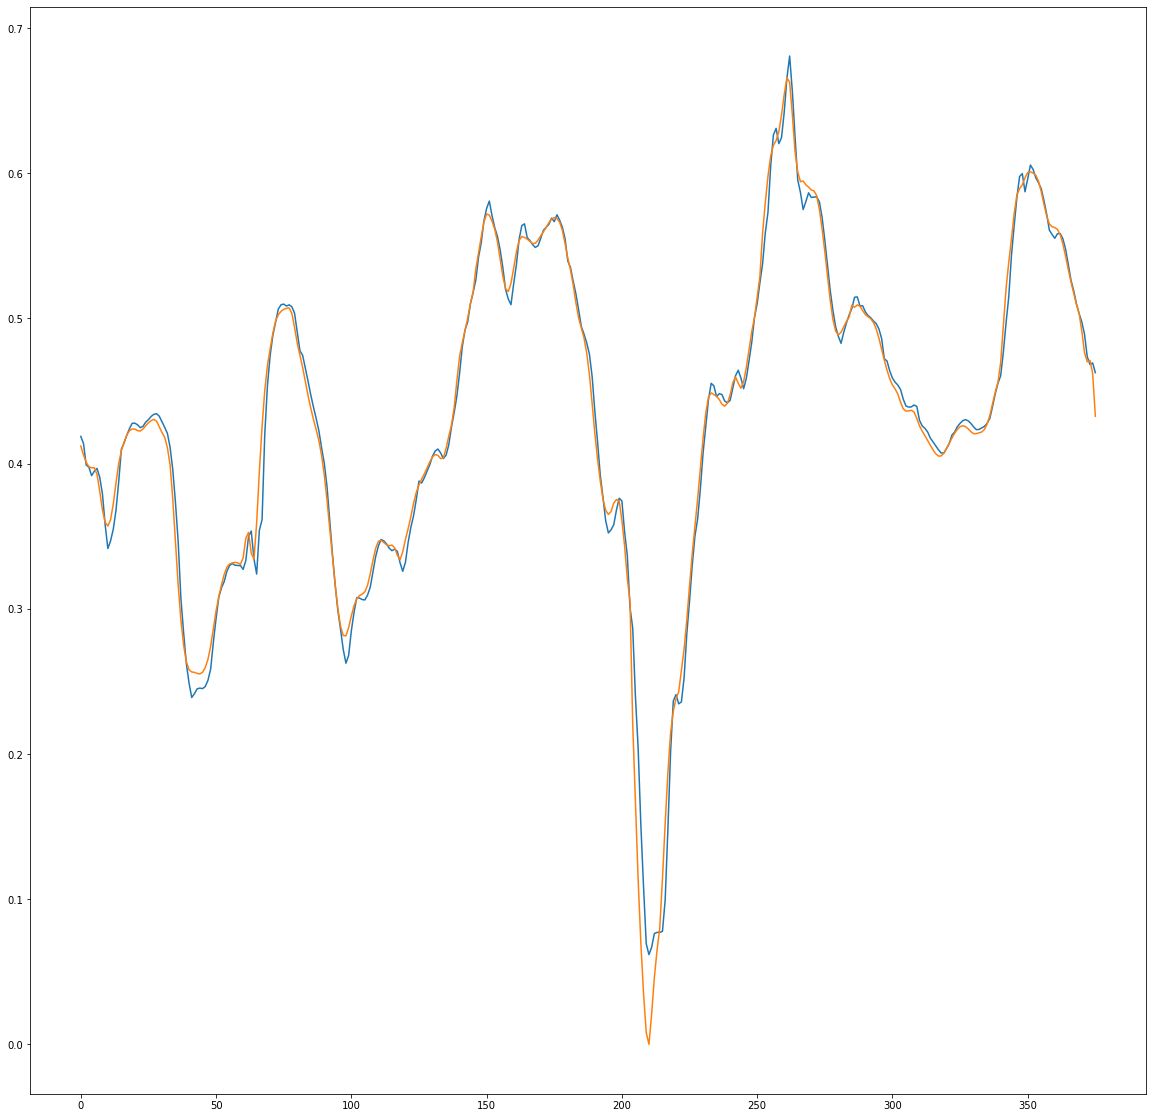

In [513]:
plt.figure(figsize=(20,20))
plt.plot(CNNLSTMpred2)
plt.plot(testyCnn)